# GRT Integration Multidimensional

In this notebook we perform a full analysis using the tools of gravray

In [1]:
from gravray import *
from gravray.util import *
from gravray.stats import *
from gravray.spice import *
from gravray.plot import *
from gravray.sampling import *
from gravray.orbit import *

from tqdm import tqdm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# https://pypi.org/project/quadpy/
import quadpy
import numpy

In [6]:
def f(x):
    return numpy.sin(x[0]) * numpy.sin(x[1])
triangle = numpy.array([[0.0, 0.0], [1.0, 0.0], [0.7, 0.5]])
val = quadpy.triangle.strang_fix_cowper_09().integrate(f, triangle)
val

0.022921002763062442

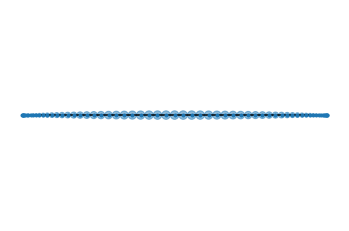

In [7]:
fig=plt.figure()
scheme = quadpy.line_segment.gauss_patterson(5)
val = scheme.integrate(lambda x: numpy.exp(x), [0.0, 1.0])
scheme.show()


In [8]:
scheme = quadpy.e2r2.rabinowitz_richter_3()
val = scheme.integrate(lambda x: x[0]**2)
val

1.5707963267948966

In [9]:
dim = 4
scheme = quadpy.ncube.stroud_cn_3_3(dim)
scheme.integrate(
    lambda x: numpy.exp(-(x[0]**2+x[1]**2+x[2]**2+x[3]**2)),
    quadpy.ncube.ncube_points([0.0, 1.0], [0.1, 0.9], [-1.0, 1.0], [-1.0, -0.5])
    )

0.2003088022615092

In [10]:
NFUNS=0
def fun(x):
    global NFUNS
    y=numpy.exp(np.sin(x[0])*x[1]*x[2])
    NFUNS+=1
    return y

In [12]:
dim = 3
lim=1
#scheme = quadpy.ncube.stroud_cn_3_3(dim)
#scheme = quadpy.ncube.dobrodeev_1978(dim) #*
#scheme = quadpy.ncube.hammer_stroud_2n(dim)
scheme = quadpy.ncube.phillips(dim) #**
#scheme = quadpy.ncube.stroud_cn_5_9(dim) #
scheme.integrate(fun,quadpy.ncube.ncube_points([-lim, lim],[0.0, lim],[0.0, lim]))

2.0305719732666216

In [13]:
NFUNS=0
def fun(x):
    global NFUNS
    NFUNS+=1
    print("Call")
    return x[0]**2*np.sin(x[1])*np.tan(x[2]**3)

In [14]:
dim = 3
scheme = quadpy.ncube.stroud_cn_3_3(dim)
#scheme = quadpy.ncube.dobrodeev_1978(dim) #*
#scheme = quadpy.ncube.hammer_stroud_2n(dim)
#scheme = quadpy.ncube.phillips(dim) #**
#scheme = quadpy.ncube.stroud_cn_5_9(dim) #
scheme.integrate(fun,quadpy.ncube.ncube_points([0.0, 1.0],[0.0,np.pi/2],[0.0,2*np.pi]))

Call


-0.7232941981410311